# Sample Data Wrangling Project

## OpenStreetMap Sample Project - Data Wrangling with MongoDB

In [1]:
import pprint
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from IPython.display import Image, display

### 1 - Data Preparation

**Map Area: Saint-Joseph - Île de La Réunion**
- http://www.openstreetmap.org/relation/1282272#map=12/-21.2918/55.6440
- http://overpass-api.de/api/map?bbox=55.4871,-21.4039,55.8009,-21.1796

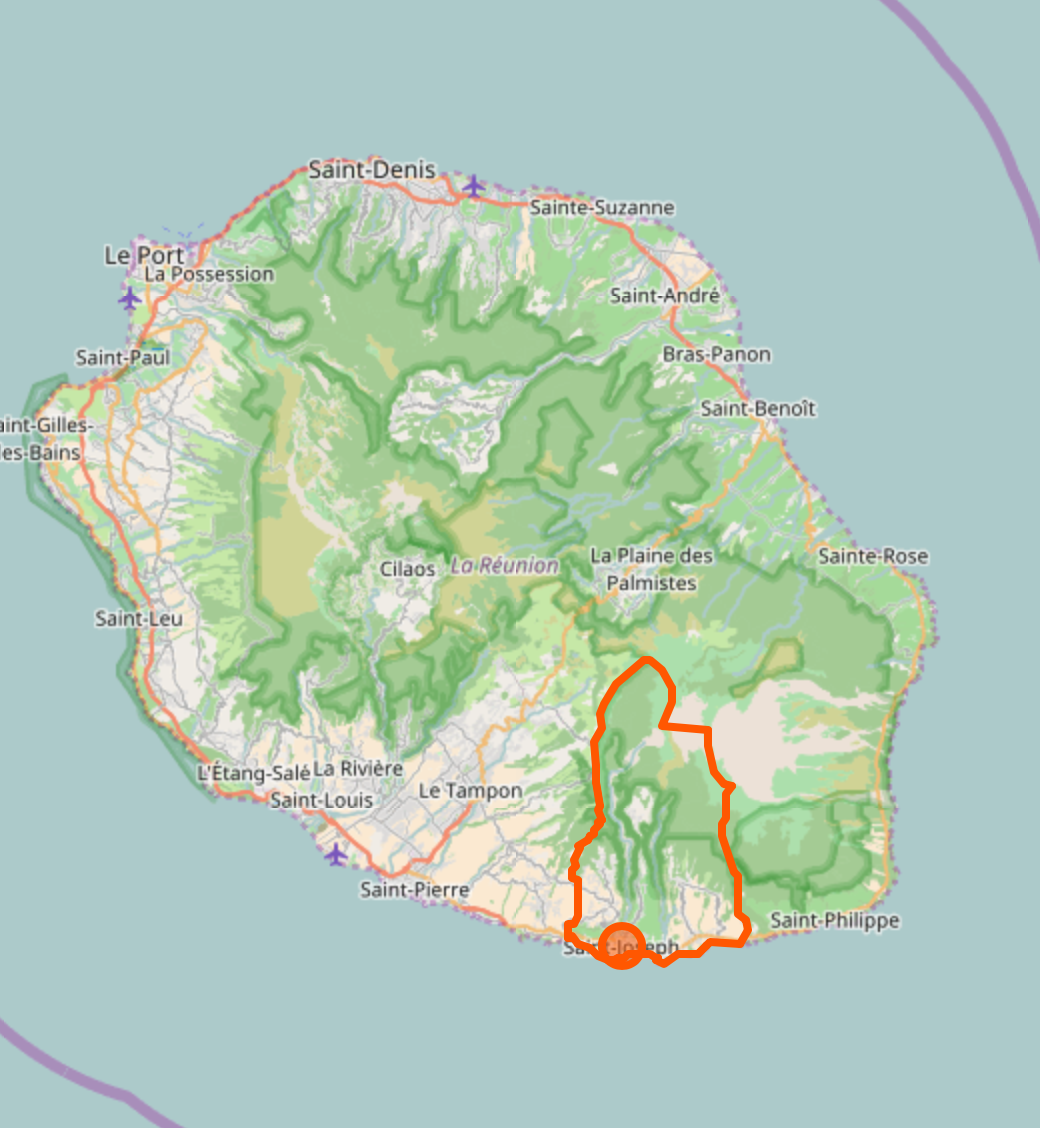

In [2]:
Image(filename='LaReunion.png', width=300, height=300)

In [3]:
import OpenStreetMapTools

In [4]:
OSM_FILE = "Saint-Joseph.La-Reunion.osm" 
SAMPLE_FILE = "Saint-Joseph.La-Reunion.sample.osm"

#### 1.1 - Sample Data

In [5]:
OpenStreetMapTools.process_sample(file_in=OSM_FILE, file_out=SAMPLE_FILE, k=K)

#### 1.1.1 - node and way xml tags

**Data Source:** https://www.data.gouv.fr/s/resources/fichier-fantoir-des-voies-et-lieux-dits/community/20150512-103719/Descriptif_FANTOIR.pdf

From FANTOIR database we extract all possible well spelled Way Types

In [6]:
FANTOIR1016_WAY_TYPE = pd.read_csv("FANTOIR2016-WAY-TYPE.csv", sep=";")
expected_way_types = FANTOIR1016_WAY_TYPE.LIBELLE.apply(lambda x: x.title()).values
FANTOIR1016_WAY_TYPE.head()

,CODE,LIBELLE
0,ACH,ANCIEN CHEMIN
1,AER,AERODROME
2,AERG,AEROGARE
3,AGL,AGGLOMERATION
4,AIRE,AIRE


In [7]:
st_types = OpenStreetMapTools.audit(SAMPLE_FILE, expected_way_types)
pprint.pprint(dict(st_types))

{'ALLEE': set(['ALLEE DES PERDRIX']),
 u'All\xe9e': set([u'All\xe9e Des Colombes',
                   u'All\xe9e Des Mouettes',
                   u'All\xe9e de Grenoble',
                   u"All\xe9e de l'Horloge",
                   u'All\xe9e des Agathes',
                   u'All\xe9e des Ecrins',
                   u'All\xe9e des Fleurs de Cannes',
                   u'All\xe9e des Hibiscus',
                   u'All\xe9e des Jolis Coeurs',
                   u'All\xe9e des Martins',
                   u'All\xe9e des Orchid\xe9es',
                   u'All\xe9e du V\xe9suve']),
 'Boucle': set(['Boucle des Basaltes']),
 'CHEMIN': set(['CHEMIN LEOPOLD LEBON', 'CHEMIN MONDON']),
 'Cemin': set(['Cemin piton terre rouge']),
 'Ch.Lolotte': set(['Ch.Lolotte']),
 'Charles': set(['Charles Baudelaire']),
 'Chemain': set(['Chemain melanie robert']),
 'Grande': set(['Grande Savanne']),
 'Hubert': set(['Hubert Delisle']),
 'IMPASSE': set(['IMPASSE PITON DUGAIN']),
 'IMPdes': set(['IMPdes RADI

From the sample data above, we can identify at least the following problems:
1. Street types are wrongling spelled or abbreviated
2. No street types
3. Mixed encoding type
4. Street name case not consistent (Full upercase or lowercase or mix)

##### A first cleansing approach to address the problems listed above...

In [8]:
# Map to the correct Street type 
street_type_mapping = { 
    "ALLEE": "Allee",
    "Allee": "Allee",
    "Alle": "Allee",
    u'All\xe8e': "Allee",
    u'All\xe9e': "Allee",
    "avenue": "Avenue",
    "Chemain": "Chemin",
    "Ch.": "Chemin",
    "Ch ": "Chemin",
    "Ch": "Chemin",
    "Che": "Chemin",
    "Cemin": "Chemin",
    "chemin": "Chemin",
    "Ch.Lolotte": "Chemin Lolotte",
    "Imp": "Impasse",
    "Imp.": "Impasse",
    "IMPASSE": "Impasse",
    "impasse": "Impasse",
    "IMPdes": "Impasse des",
    "RUE": "Rue",
    "Voi": "Voie"
}

# Update wrongly spelled or abbreviated Street names 
# and complete if necesseray (i.e.: ""Katia et Maurice Kraft": "Rue Katia et Maurice Kraft")
street_name_mapping = {
    "Jean Lauret": "Lieu-dit Jean Lauret",
    "Fortune Hoarau": u"Rue Fortuné Hoarau",
    "Sentier Prunes": "Sentier Des Prunes",
    u"allée des flamant": "Allee Des Flamants",
    "Che De L'Ariege": "Chemin De L'Ariege",
    "Katia et Maurice Kraft": "Rue Katia et Maurice Kraft",
    "Grande Savanne": "Lieu-dit Grande Savanne",
    "Hubert Delisle": "Rue Hubert Delisle",
    "Ch Des Gueri Vit": "Impasse Guerit Vite",
    "Voi cite les saphirs": "Voie Cite les saphirs"
}

# Choice is made to avoid latin characters at this level of cleansing...

In [9]:
for st_type, ways in st_types.iteritems():
    for name in ways:
        better_name = OpenStreetMapTools.update_name(name, street_type_mapping, street_name_mapping)
        print name, "=>", better_name

Boucle des Basaltes => Boucle Des Basaltes
Imp Des Sans Soucis => Impasse Des Sans Soucis
Imp. Pic du Midi => Impasse Pic Du Midi
Imp. Du Mans => Impasse Du Mans
Imp. Des Kakis => Impasse Des Kakis
Imp. Des Forestiers => Impasse Des Forestiers
Imp. de Monaco => Impasse De Monaco
Imp. Jules Grondin => Impasse Jules Grondin
Imp. Des Cocotiers => Impasse Des Cocotiers
Imp. Des Nefliers => Impasse Des Nefliers
Cemin piton terre rouge => Chemin Piton Terre Rouge
allée des flamant => Allee Des Flamants
Notre Dame De La Paix La Chapelle => Notre Dame De La Paix La Chapelle
ALLEE DES PERDRIX => Allee Des Perdrix
CHEMIN MONDON => Chemin Mondon
CHEMIN LEOPOLD LEBON => Chemin Leopold Lebon
chemin des pins => Chemin Des Pins
chemin rene gonthier => Chemin Rene Gonthier
chemin Grand Tampon => Chemin Grand Tampon
chemin Robin => Chemin Robin
IMPdes RADIS => Impasse Des Radis
rue de l'Ilet => Rue De L'Ilet
IMPASSE PITON DUGAIN => Impasse Piton Dugain
Grande Savanne => Lieu-Dit Grande Savanne
Chemain 

#### 1.2 - Full Dataset

#### 1.2.1 - node and way xml tags

In [10]:
full_st_types = OpenStreetMapTools.audit(OSM_FILE, expected_way_types)
pprint.pprint(dict(full_st_types))

{'ALLEE': set(['ALLEE DES PERDIX', 'ALLEE DES PERDRIX']),
 'Alfred': set(['Alfred Lacroix']),
 'Alle': set(['Alle de vivoi']),
 u'All\xe9e': set([u'All\xe9e Des Colombes',
                   u'All\xe9e Des Mouettes',
                   u'All\xe9e Jacques Lougnon',
                   u'All\xe9e de Grenoble',
                   u'All\xe9e de Pamplemousses',
                   u"All\xe9e de l'Horloge",
                   u'All\xe9e des Agathes',
                   u'All\xe9e des Aub\xe9pines',
                   u'All\xe9e des Campeurs',
                   u'All\xe9e des Ecrins',
                   u'All\xe9e des Fleurs de Cannes',
                   u'All\xe9e des Grands Kiosques',
                   u'All\xe9e des Hibiscus',
                   u'All\xe9e des Jolis Coeurs',
                   u'All\xe9e des Lataniers',
                   u'All\xe9e des Martins',
                   u'All\xe9e des Orchid\xe9es',
                   u'All\xe9e des Pens\xe9es',
                   u'All\xe9e d

In [11]:
for full_st_types, ways in st_types.iteritems():
    for name in ways:
        better_name = OpenStreetMapTools.update_name(name, street_type_mapping, street_name_mapping)
        print name, "=>", better_name

Boucle des Basaltes => Boucle Des Basaltes
Imp Des Sans Soucis => Impasse Des Sans Soucis
Imp. Pic du Midi => Impasse Pic Du Midi
Imp. Du Mans => Impasse Du Mans
Imp. Des Kakis => Impasse Des Kakis
Imp. Des Forestiers => Impasse Des Forestiers
Imp. de Monaco => Impasse De Monaco
Imp. Jules Grondin => Impasse Jules Grondin
Imp. Des Cocotiers => Impasse Des Cocotiers
Imp. Des Nefliers => Impasse Des Nefliers
Cemin piton terre rouge => Chemin Piton Terre Rouge
allée des flamant => Allee Des Flamants
Notre Dame De La Paix La Chapelle => Notre Dame De La Paix La Chapelle
ALLEE DES PERDRIX => Allee Des Perdrix
CHEMIN MONDON => Chemin Mondon
CHEMIN LEOPOLD LEBON => Chemin Leopold Lebon
chemin des pins => Chemin Des Pins
chemin rene gonthier => Chemin Rene Gonthier
chemin Grand Tampon => Chemin Grand Tampon
chemin Robin => Chemin Robin
IMPdes RADIS => Impasse Des Radis
rue de l'Ilet => Rue De L'Ilet
IMPASSE PITON DUGAIN => Impasse Piton Dugain
Grande Savanne => Lieu-Dit Grande Savanne
Chemain 

The cleansing developed on the sample dataset seems to address the main issues present in the full dataset

### 2 - From XML to JSON to MongoDB

#### 2.1 - Create JSON file

Based on the cleansing identified in previous section, Street names will be partially updated during the JSON file generation

In [12]:
ways_json_data = OpenStreetMapTools.process_map(OSM_FILE, street_type_mapping, street_name_mapping, True)

In [13]:
[x for x in ways_json_data if x["id"] == "3480487005"]

[{'address': {'city': 'Le Tampon',
   'country': 'RE',
   'housenumber': '9',
   'postcode': '97418',
   'street': 'Chemin Lolotte'},
  'created': {'changeset': '30524782',
   'timestamp': '2015-04-27T04:28:30Z',
   'uid': '2558417',
   'user': 'Pensedent',
   'version': '1'},
  'id': '3480487005',
  'pos': [-21.2405757, 55.5593995],
  'type': 'node'}]

#### 2.2 - MongoDB Import

In [14]:
!mongo OpenStreetMap --eval "db.dropDatabase()"

MongoDB shell version v3.4.1
connecting to: mongodb://127.0.0.1:27017/OpenStreetMap
MongoDB server version: 3.4.1
{ "dropped" : "OpenStreetMap", "ok" : 1 }


In [15]:
!mongoimport -d OpenStreetMap -c LaReunion --file data/Saint-Joseph.La-Reunion.osm.json

2017-01-26T04:50:28.329+0100	connected to: localhost
2017-01-26T04:50:31.320+0100	[########################] OpenStreetMap.LaReunion	226MB/35.9MB (630.8%)
2017-01-26T04:50:34.319+0100	[########################] OpenStreetMap.LaReunion	226MB/72.0MB (314.3%)
2017-01-26T04:50:37.319+0100	[########################] OpenStreetMap.LaReunion	226MB/107MB (210.6%)
2017-01-26T04:50:40.319+0100	[########################] OpenStreetMap.LaReunion	226MB/144MB (157.0%)
2017-01-26T04:50:43.322+0100	[########################] OpenStreetMap.LaReunion	226MB/185MB (122.0%)
2017-01-26T04:50:45.543+0100	[########################] OpenStreetMap.LaReunion	226MB/226MB (100.0%)
2017-01-26T04:50:45.543+0100	imported 801017 documents


#### 2.3 - Data Overview

In [16]:
from pymongo import MongoClient
from bson.son import SON

client = MongoClient()

def pretty(documents):
    for document in documents:
        pprint.pprint(document)

In [17]:
db = client.OpenStreetMap

Just peek the previously selected sample example from our python cleansing code

In [18]:
pretty(db.LaReunion.find({"id": "3480487005"}))

{u'_id': ObjectId('58897211a1f060bb696b3090'),
 u'address': {u'city': u'Le Tampon',
              u'country': u'RE',
              u'housenumber': u'9',
              u'postcode': u'97418',
              u'street': u'Chemin Lolotte'},
 u'created': {u'changeset': u'30524782',
              u'timestamp': u'2015-04-27T04:28:30Z',
              u'uid': u'2558417',
              u'user': u'Pensedent',
              u'version': u'1'},
 u'id': u'3480487005',
 u'pos': [-21.2405757, 55.5593995],
 u'type': u'node'}


Check that we have the same count as the result of our python cleansing code 

In [19]:
db.LaReunion.count() == len(ways_json_data)

True

Count the number of "xml node" imported

In [20]:
pipeline = [
    {"$unwind": "$type"},
    {"$group": {"_id": "$type", "count": {"$sum": 1}}},
    {"$sort": SON([("count", -1), ("_id", -1)])}
]
nodes = pd.DataFrame(list(db.LaReunion.aggregate(pipeline)))
nodes.columns = ["node", "count"]
nodes.head()

,node,count
0,node,687373
1,way,113637
2,multipolygon,7


How many different users have contributed to this database?

In [21]:
len(db.LaReunion.find().distinct("created.user"))

320

When did the contribution take place?

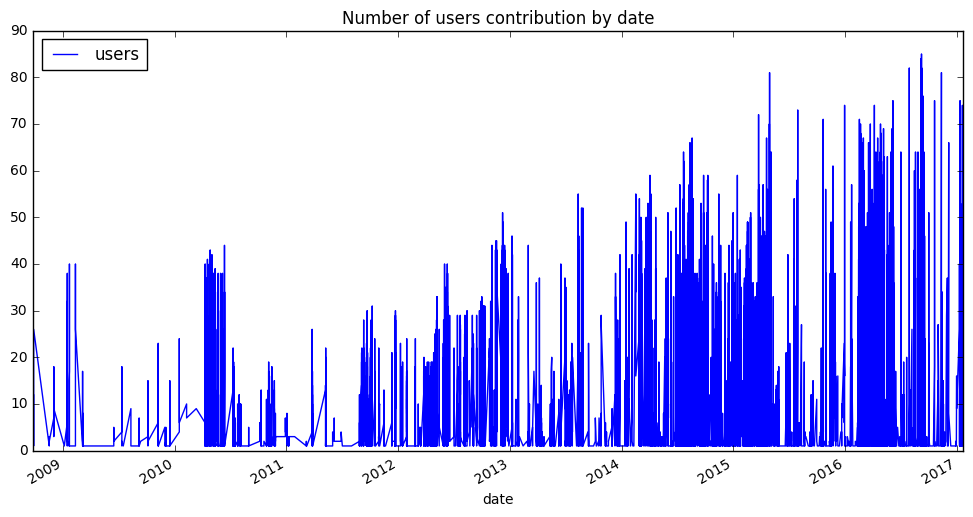

In [22]:
pipeline = [
    {"$project": {"_id": False, "timestamp":  "$created.timestamp", "user": "$created.user" } },
    {"$group": {"_id": "$timestamp",  "users": { "$sum": 1 }}}
]
contributions = pd.DataFrame(list(db.LaReunion.aggregate(pipeline)))
contributions["_id"] = pd.to_datetime(contributions._id)
contributions.columns = ["date", "users"]
axes = contributions.set_index(['date']).plot(figsize=(12,6), title="Number of users contribution by date")

We have quite recent contributions for this dataset, let's identify the top 10 contributors?

In [23]:
pipeline = [
    { "$project": { "_id": False, "user": "$created.user" } },
    { "$group": { "_id": "$user", "count": { "$sum": 1 } } },
    { "$sort": SON([("count", -1), ("_id", -1)]) },
    { "$limit": 10 }
]
pretty(list(db.LaReunion.aggregate(pipeline)))

{u'_id': u'arnaud_mapali', u'count': 561495}
{u'_id': u'JFK73', u'count': 57169}
{u'_id': u'willy zettor', u'count': 48847}
{u'_id': u'vherbreteau', u'count': 23737}
{u'_id': u'mk67', u'count': 22552}
{u'_id': u'Damouns', u'count': 16652}
{u'_id': u'botdidier2020', u'count': 7606}
{u'_id': u'Pensedent', u'count': 6517}
{u'_id': u'vincentselly', u'count': 6346}
{u'_id': u'rando67', u'count': 5482}


We can consider having 1 top contributor followed by 5 high contributors... let see the distribution of the contribution for all users

In [24]:
pipeline = [
    { "$project": { "_id": False, "user": "$created.user" } },
    { "$group": { "_id": "$user", "count": { "$sum": 1 } } },
    { "$sort": SON([("count", -1), ("_id", -1)]) },
    { "$project": { "_id": "$count"} }
]
contributions = pd.DataFrame(list(db.LaReunion.aggregate(pipeline)))
contributions.describe()

,_id
count,320.000000
mean,2503.178125
std,31697.400736
min,1.000000
25%,2.000000
50%,16.000000
75%,72.000000
max,561495.000000


The above ouput clearly show that we have outliers in term of user contribution... just see if mongodb can provide us the distribution of the all users contribution with a predefined bins.

In [25]:
pipeline = [
    { "$project": { "_id": False, "user": "$created.user" } },
    { "$group": { "_id": "$user", "count": { "$sum": 1 } } },
    {
        "$bucket": {
            "groupBy": "$count",
            "boundaries": [ 1, 100, 10000, 25000, 100000 ],
            "default": "TOP",
            "output": {
              "count": { "$sum": 1 },
              "users": { "$push": "$_id" }
            }
        }
    }
]
contributions = pd.DataFrame(list(db.LaReunion.aggregate(pipeline)))
contributions

,_id,count,users
0,1,250,"[Quegou, POTHIN Thomas, GerdP, aluka, andygol,..."
1,100,64,"[ptityeti, hugoVR, Eric33, SuperBaloo, Flanel9..."
2,10000,3,"[mk67, Damouns, vherbreteau]"
3,25000,2,"[JFK73, willy zettor]"
4,TOP,1,[arnaud_mapali]


The result confirm that most user are below 100 contributions and the main contributors are composed of 5 high contributors  and TOP contributor

### 3 - How MongoDb will ease the data cleansing process...?

First focus on all document with type='node' and having a subdocument 'address'

In [26]:
pipeline = [
    { "$match": { "type": "node", "address": { "$exists": True } } },
    { "$project": { "_id": False, 
                   "city": "$address.city", 
                   "housenumber": "$address.housenumber", 
                   "postcode": "$address.postcode", 
                   "street": "$address.street" } },
    #{ "$limit": 10 }
]
addresses = pd.DataFrame(list(db.LaReunion.aggregate(pipeline)))
addresses.shape

(8819, 4)

In [27]:
addresses.describe()

,city,housenumber,postcode,street
count,8772,8643,8776,8777
unique,28,1348,10,639
top,Le Tampon,3,97418,Chemin Communal Du Petit Tampon
freq,6102,220,4266,164


There is some missing data for all selected attributes

In [28]:
addresses.head()

,city,housenumber,postcode,street
0,Le Tampon,74,97430,Rue Jules Bertaut
1,LE TAMPON,129,97430,Martinel Lassays
2,Le Tampon,46,97430,Rue Du General De Gaulle
3,Le Tampon,54,97430,Rue Du Docteur Charrières
4,Le Tampon,NaN,97418,Rue Katia Et Maurice Kraft


#### 3.1 - City

Let see if we can identify any problems with city attribute...  Can we recover the missing data for the city? 

This will be possible if the postcode is not null... to crosscheck with the postcal code as available at "http://datanova.legroupe.laposte.fr/explore/dataset/laposte_hexasmal/download/?format=csv&timezone=Europe/Berlin&use_labels_for_header=true"

Content is described at "https://www.data.gouv.fr/fr/datasets/base-officielle-des-codes-postaux/", we will the following fields Nom_commune	and Code_postal

In [29]:
import io
import requests
url="http://datanova.legroupe.laposte.fr/explore/dataset/laposte_hexasmal/download/?format=csv&timezone=Europe/Berlin&use_labels_for_header=true"
postalcodes=pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')), sep=";")
postalcodes.head()

,Code_commune_INSEE,Nom_commune,Code_postal,Libelle_acheminement,Ligne_5
0,40072,CASTELNAU TURSAN,40320,CASTELNAU TURSAN,NaN
1,40073,CASTELNER,40700,CASTELNER,NaN
2,40075,CASTETS,40260,CASTETS,NaN
3,40080,CAZERES SUR L ADOUR,40270,CAZERES SUR L ADOUR,NaN
4,40082,CLASSUN,40320,CLASSUN,NaN


In [30]:
codes = dict(zip(postalcodes.Code_postal, postalcodes.Nom_commune))

In [31]:
citiesFromPostCode = addresses[(addresses.city.isnull() == True) & (addresses.postcode.isnull() == False)]
citiesFromPostCode.loc[:, ("city")] = citiesFromPostCode.postcode.apply(lambda x: codes[int(x)].title())
citiesFromPostCode

/Users/jmax/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,city,housenumber,postcode,street
62,St Pierre,24,97410,CD29 Mont-Vert les Bas
93,Le Tampon,NaN,97418,Impasse Des Cyprès
99,Le Tampon,NaN,97418,Rue Alfred Picard
2398,Petite Ile,16,97429,Rue Du Piton
2828,Le Tampon,27,97418,Impasse Sulzere Payet
2855,Le Tampon,124,97418,Route De Notre-Dame De La Paix
3283,Le Tampon,22,97418,Chemin Go
3477,Le Tampon,331 D,97418,Chemin Cabeu
4068,Le Tampon,10,97418,Chemin Rosemond
5492,Le Tampon,2,97418,Chemin Du Mont Blanc


In [32]:
addresses.city.unique()

array([u'Le Tampon', u'LE TAMPON', u'Saint-Pierre', u'SAINT JOSEPH', nan,
       u'Petite-\xcele', u'Saint-Philippe', u'Saint-Joseph',
       u'St-Philippe', u'Plaine des Cafres', u'Saint Joseph',
       u'Saint Pierre', u'saint-Philippe', u'Petit', u'saint-Joseph',
       u'le Tampon', u'lE TAMPON', u'PETIT ILE', u'Petit \xeele',
       u'LA PLAINE DES CAFRES', u'Le tampon', u'le tampon', u'Le Tampion',
       u'Entre-Deux', u'Petit Ile', u'Ravine des Cabris', u'Tampon',
       u'Petite Ile', u'Bourg Murat'], dtype=object)

Two additional name to be clean "u'Petite-\xcele'" and "u'Petit \xeele'"

Not a big deal... cities in our dataset with some capitalization issues, wrong spelling and one dash missing in name, we should have the following cities spelled as follows: __Le Tampon, Saint-Pierre, Saint-Joseph, Petite-Ile...__. 'nan' value could not be updated

We can quickly solve this with python calling title() and replacing space with a dash for some cities....

In [33]:
def cleanName(x):
    if x == u'Petite-\xcele' or x == u'Petit \xeele':
        return u'Petite-Ile'
    elif x.startswith("Saint") or x.startswith("Petite"):
        return x.replace(" ", "-").title()
    elif x == "Petit" or x.startswith("Petit ") or x.startswith("PETIT"):
        return "Petite-Ile"
    elif x in ["Le Tampion", "Tampon"]:
        return "Le Tampon"
    elif x.startswith("St"):
        return x.replace("St", "Saint").title()
    else:
        return x.title()

In [34]:
addresses.loc[:, ("city")] = addresses.city.dropna().apply(lambda x: str(cleanName(x)))
addresses.city.dropna().unique()

array(['Le Tampon', 'Saint-Pierre', 'Saint Joseph', 'Petite-Ile',
       'Saint-Philippe', 'Saint-Joseph', 'Plaine Des Cafres',
       'La Plaine Des Cafres', 'Entre-Deux', 'Ravine Des Cabris',
       'Bourg Murat'], dtype=object)

In [35]:
rev_codes = {v: k for k, v in codes.items()}
def reviewCityNameForLookup(x):
    return rev_codes[x.upper().replace("-", " ").replace("SAINT", "ST")]

In [36]:
citiesToPostCode = addresses[(addresses.city.isnull() == False) & (addresses.postcode.isnull() == True)]

citiesToPostCode.loc[:, ("postcode")] = citiesToPostCode.city.dropna().apply(lambda x: reviewCityNameForLookup(x))
citiesToPostCode

,city,housenumber,postcode,street
409,Saint-Philippe,32,97442,Route Nationale 2 Basse Vallée
1209,Saint-Philippe,36,97442,Route Nationale 2 Leconte De Lisle
1657,Saint-Philippe,28,97442,Route Nationale 2 Ravine Ango
1882,Petite-Ile,NaN,97429,NaN
1883,Saint-Joseph,NaN,97480,Boulevard De L'Ocean
2491,Petite-Ile,NaN,97429,NaN
2863,Le Tampon,87 C,97430,Route De Notre-Dame De La Paix
3321,Le Tampon,9,97430,Impasse Tan Rouge
5530,Le Tampon,68,97430,Chemin Mussard
8020,Le Tampon,NaN,97430,Chemin Communal Du Petit Tampon


In [37]:
len(addresses.postcode.dropna().unique()) == len(addresses.city.dropna().unique())

False

The above code addressed some issues identified in the City and PostCode fields, what about street? What are the issues?

We are going to use the same FANTOIR DATABASE as referenced above.... 

In [38]:
FANTOIR1016 = pd.read_table("FANTOIR1016", header=None)
FANTOIR1016 = FANTOIR1016[FANTOIR1016[0].str.startswith("974") == True]
FANTOIR1016.head()

,0
7636794,974 LA REUNION ...
7636795,974401 GLES AVIRONS N 3...
7636796,974401A001VLOT PITON ROUGE N 3...
7636797,974401A003XDOM DES ABEILLES N 3...
7636798,974401A005ZLOT CAFAREL N 3...


For this project we are only considering the first 41 characters in FANTOIR1016 database (see §3.4 of referenced document)

| Code département | Code direction | Code commune | Identifiant de la voie dans la commune | Clé RIVOLI | Code nature de voie | Libellé voie |

Next we are filtering all lines not having at least 11 characters before a first space
Last steps: split the data into two groupes
- | Code département | Code direction | Code commune | Identifiant de la voie dans la commune | Clé RIVOLI
- | Code nature de voie | Libellé voie |

In [39]:
FANTOIR1016_974 = FANTOIR1016[0].apply(lambda x : pd.Series(x[:41]))
FANTOIR1016_974["KEEP"] = FANTOIR1016_974[0].apply(lambda x: len(x.split(' ')[0]) >= 11)
FANTOIR1016_974 = FANTOIR1016_974[FANTOIR1016_974.KEEP == True][0].apply(lambda x: pd.Series([x[:11].strip(), 
                                                                                              x[11:15].strip(), 
                                                                                              x[15:41].strip()]))
FANTOIR1016_974.columns = ["REFERENCE", "CODE", "VOIE"]
FANTOIR1016_974.head()


,REFERENCE,CODE,VOIE
7636796,974401A001V,LOT,PITON ROUGE
7636797,974401A003X,DOM,DES ABEILLES
7636798,974401A005Z,LOT,CAFAREL
7636799,974401A008C,LOT,LES FAVRIERS
7636800,974401A015K,RES,LES MARGUERITES


In [40]:
FANTOIR1016_974_WAYS = pd.merge(left=FANTOIR1016_974, right=FANTOIR1016_WAY_TYPE, on="CODE")[["REFERENCE",
                                                                                              "CODE", 
                                                                                              "LIBELLE", 
                                                                                              "VOIE"]]

In [41]:
FANTOIR1016_974_WAYS["WAY"] = FANTOIR1016_974_WAYS[["LIBELLE", "VOIE"]].apply(lambda x: ' '.join(x), axis=1)
FANTOIR1016_974_WAYS.head()

,REFERENCE,CODE,LIBELLE,VOIE,WAY
0,974401A001V,LOT,LOTISSEMENT,PITON ROUGE,LOTISSEMENT PITON ROUGE
1,974401A005Z,LOT,LOTISSEMENT,CAFAREL,LOTISSEMENT CAFAREL
2,974401A008C,LOT,LOTISSEMENT,LES FAVRIERS,LOTISSEMENT LES FAVRIERS
3,974402A001R,LOT,LOTISSEMENT,BADAMIERS,LOTISSEMENT BADAMIERS
4,974402A002S,LOT,LOTISSEMENT,BAIES ROSES I,LOTISSEMENT BAIES ROSES I


Now we have a clean and official list of street name for our region, let identify which street name are not in listed in this reference (street name will be uppercase and with not latin letter for comparison)

In [42]:
xtd = {ord(u'’'): u"'", ord(u'é'): u'e', ord(u'è'): u'e', ord(u'É'): u'E',}
def tr(x):
    return x.translate(xtd).upper()

In [43]:
addresses.loc[:, ("street")] = addresses.street.dropna().apply(lambda x: tr(x))
addresses.head()

,city,housenumber,postcode,street
0,Le Tampon,74,97430,RUE JULES BERTAUT
1,Le Tampon,129,97430,MARTINEL LASSAYS
2,Le Tampon,46,97430,RUE DU GENERAL DE GAULLE
3,Le Tampon,54,97430,RUE DU DOCTEUR CHARRIERES
4,Le Tampon,NaN,97418,RUE KATIA ET MAURICE KRAFT


In [44]:
addresses["CHECKED"] = addresses.street.dropna().apply(lambda x: x in FANTOIR1016_974_WAYS.WAY.values)
addresses.head()

,city,housenumber,postcode,street,CHECKED
0,Le Tampon,74,97430,RUE JULES BERTAUT,True
1,Le Tampon,129,97430,MARTINEL LASSAYS,False
2,Le Tampon,46,97430,RUE DU GENERAL DE GAULLE,True
3,Le Tampon,54,97430,RUE DU DOCTEUR CHARRIERES,False
4,Le Tampon,NaN,97418,RUE KATIA ET MAURICE KRAFT,False


In [45]:
addresses[addresses.CHECKED == False].street.head()

1                MARTINEL LASSAYS
3       RUE DU DOCTEUR CHARRIERES
4      RUE KATIA ET MAURICE KRAFT
7      RUE KATIA ET MAURICE KRAFT
12    AVENUE DU GENERAL DE GAULLE
Name: street, dtype: object

In [46]:
addresses[addresses.CHECKED == False].count()

city           2505
housenumber    2446
postcode       2506
street         2514
CHECKED        2514
dtype: int64

Let's see what could be the problems...

In [47]:
FANTOIR1016_974_WAYS[FANTOIR1016_974_WAYS.VOIE.str.find("MARTINEL") != -1]

,REFERENCE,CODE,LIBELLE,VOIE,WAY
3971,9744221330D,CHE,CHEMIN,MARTINEL LASSAYS,CHEMIN MARTINEL LASSAYS
12798,9744221314L,RUE,RUE,MARTINEL LASSAYS,RUE MARTINEL LASSAYS
12800,9744221340P,RUE,RUE,MARTINEL LASSAYS,RUE MARTINEL LASSAYS


Two possibilities... cannot be solved at this level

In [48]:
FANTOIR1016_974_WAYS[FANTOIR1016_974_WAYS.VOIE.str.find("CHARRIE") != -1]

,REFERENCE,CODE,LIBELLE,VOIE,WAY
6645,9744050589X,IMP,IMPASSE,DE CHARRIE,IMPASSE DE CHARRIE
12687,9744220660A,RUE,RUE,DU DOCTEUR CHARRIERE,RUE DU DOCTEUR CHARRIERE


Bad spelling...

In [49]:
FANTOIR1016_974_WAYS[FANTOIR1016_974_WAYS.WAY.str.find("AVENUE DU GEN") != -1]

,REFERENCE,CODE,LIBELLE,VOIE,WAY
13227,9744010127M,AV,AVENUE,DU GEN DE GAULLE,AVENUE DU GEN DE GAULLE
13354,9744160566Z,AV,AVENUE,DU GENERAL DE GAULLE RN2,AVENUE DU GENERAL DE GAULLE RN2


We also have some shortcut... to simplify the update, all names not referenced will be manually updated from a file

In [50]:
streets = pd.DataFrame(addresses[addresses.CHECKED == False].street.unique())
streets["New"] = streets[0]
streets.columns = ["Old", "New"]
streets.to_csv("street_name_update.csv", 
               encoding='utf-8',
               index=False,
               quoting=2
              )

In [51]:
# Read back the updated file (not completly updated... to show case only!!)
streets = pd.read_csv("street_name_update.csv")
streets.head()

,Old,New
0,MARTINEL LASSAYS,MARTINEL LASSAYS
1,RUE DU DOCTEUR CHARRIERES,RUE DU DOCTEUR CHARRIERES
2,RUE KATIA ET MAURICE KRAFT,RUE KATIA ET MAURICE KRAFT
3,AVENUE DU GENERAL DE GAULLE,AVENUE DU GENERAL DE GAULLE
4,RUE RAPHAËL BABET,RUE RAPHAËL BABET


In [52]:
streetNames = dict(zip(streets.Old, streets.New))
def streetNameUpdate(name):
    return streetNames[name] if name in streetNames.keys() else name

In [53]:
addresses.street.apply(lambda x: streetNameUpdate(x)).head()

/Users/jmax/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  app.launch_new_instance()


0             RUE JULES BERTAUT
1              MARTINEL LASSAYS
2      RUE DU GENERAL DE GAULLE
3     RUE DU DOCTEUR CHARRIERES
4    RUE KATIA ET MAURICE KRAFT
Name: street, dtype: object

We have identify some rules to (partially) update the addresses, why not updating the mongo database...

** Postal Code and City **

In [54]:
# Make sure we have no space in postcode (should have enforced as integer...)
for n in db.LaReunion.find({ "type": "node", 
                            "address": { "$exists": True }, 
                            "address.postcode": { "$exists": True } }):
    postcode = n["address"]["postcode"].replace(' ', '')
    db.LaReunion.update_one({ "_id": n["_id"] }, { "$set": { "address.postcode":  postcode } }, upsert=False)

In [55]:
for n in db.LaReunion.find({ "type": "node", 
                            "address": { "$exists": True }, 
                            "address.postcode": { "$exists": True } }):
    city = codes[int(n["address"]["postcode"])]
    db.LaReunion.update_one({ "_id": n["_id"] }, { "$set": { "address.city":  city } }, upsert=False)

In [56]:
pipeline = [
    { "$match": { "type": "node", "address": { "$exists": True }, "address.postcode": { "$exists": True } } },
    { "$project": { "_id": False, 
                   "city": "$address.city", 
                   "housenumber": "$address.housenumber", 
                   "postcode": "$address.postcode", 
                   "street": "$address.street" } },
    { "$limit": 10 }
]
pd.DataFrame(list(db.LaReunion.aggregate(pipeline)))

,city,housenumber,postcode,street
0,LE TAMPON,74,97430,Rue Jules Bertaut
1,LE TAMPON,129,97430,Martinel Lassays
2,LE TAMPON,46,97430,Rue Du General De Gaulle
3,LE TAMPON,54,97430,Rue Du Docteur Charrières
4,LE TAMPON,NaN,97418,Rue Katia Et Maurice Kraft
5,LE TAMPON,31,97430,Rue Jules Ferry
6,ST PIERRE,18 ter,97410,Chemin Roland Garros
7,LE TAMPON,NaN,97418,Rue Katia Et Maurice Kraft
8,ST JOSEPH,NaN,97480,NaN
9,LE TAMPON,22,97418,Chemin De L'École


In [57]:
for n in db.LaReunion.find({ 
        "type": "node", 
        "address": { "$exists": True }, 
        "address.city": { "$exists": True },
        "address.postcode": { "$exists": False }}):
    postcode = reviewCityNameForLookup(cleanName(n["address"]["city"]))
    db.LaReunion.update_one({ "_id": n["_id"] }, { "$set": { "address.postcode":  postcode } }, upsert=False)

In [58]:
pretty(list(db.LaReunion.find({ 
        "type": "node", 
        "address": { "$exists": True }, 
        "address.city": { "$exists": False },
        "address.postcode": { "$exists": False }}).limit(2)))

{u'_id': ObjectId('58897204a1f060bb69614705'),
 u'address': {u'housename': u'College de la Chatoire'},
 u'amenity': u'school',
 u'building': u'school',
 u'created': {u'changeset': u'24844456',
              u'timestamp': u'2014-08-18T21:10:52Z',
              u'uid': u'662440',
              u'user': u'JFK73',
              u'version': u'4'},
 u'id': u'699656031',
 u'name': u'College de la Chatoire',
 u'pos': [-21.277564, 55.5056748],
 u'source': u'cadastre-dgi-fr source : Direction G\xe9n\xe9rale des Imp\xf4ts - Cadastre. Mise \xe0 jour : 2010',
 u'type': u'node',
 u'wheelchair': u'yes'}
{u'_id': ObjectId('58897209a1f060bb696509eb'),
 u'address': {u'housenumber': u'22', u'street': u'Rue Roland Garros'},
 u'created': {u'changeset': u'32533919',
              u'timestamp': u'2015-07-10T04:01:53Z',
              u'uid': u'71571',
              u'user': u'jnoel974',
              u'version': u'3'},
 u'id': u'1560270795',
 u'name': u'La Poussini\xe8re',
 u'pos': [-21.3771698, 55.6135967],


Still some cleaning to be done... but not possible with the information we have in hands

### 3 - Conclusion

The dataset is far not complete and accurate. The different steps followed during the cleansing process has demonstrated that the dataset can be completed and made more accurate with some simple rules and correlation with some external databases. The process did not delivered a clean and accurate database as a lot a of specific rules need to be put in place as well as a better identification of external database that will make possible an automated process.

I think it will be interesting to have an automated validation of the data during the update of OpenStreetMap, such as crosscheck of city, postcode, street name from external and official database on per country basis (if it does exists).